In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
path = Path('/content/drive/My Drive/Datasets/natural-images/natural_images')


In [0]:
path.ls()

[PosixPath('/content/drive/My Drive/Datasets/natural-images/natural_images/person'),
 PosixPath('/content/drive/My Drive/Datasets/natural-images/natural_images/fruit'),
 PosixPath('/content/drive/My Drive/Datasets/natural-images/natural_images/flower'),
 PosixPath('/content/drive/My Drive/Datasets/natural-images/natural_images/car'),
 PosixPath('/content/drive/My Drive/Datasets/natural-images/natural_images/motorbike'),
 PosixPath('/content/drive/My Drive/Datasets/natural-images/natural_images/cat'),
 PosixPath('/content/drive/My Drive/Datasets/natural-images/natural_images/airplane'),
 PosixPath('/content/drive/My Drive/Datasets/natural-images/natural_images/dog'),
 PosixPath('/content/drive/My Drive/Datasets/natural-images/natural_images/.DS_Store')]

In [0]:
classes = ['fruit', 'flower', 'dog', 'cat', 'car', 'airplane', 'person', 'motorbike']

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [0]:
data.classes

['airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike', 'person']

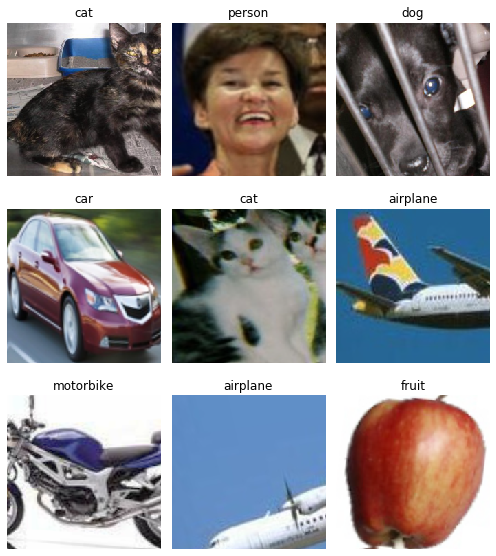

In [0]:
data.show_batch(rows=3, figsize=(7,8))

In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike', 'person'],
 8,
 5536,
 1383)

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.255553,0.015124,0.997108,15:00
1,0.063660,0.010905,0.997108,01:03
2,0.033917,0.009464,0.998554,01:05
3,0.023878,0.009708,0.998554,01:06


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


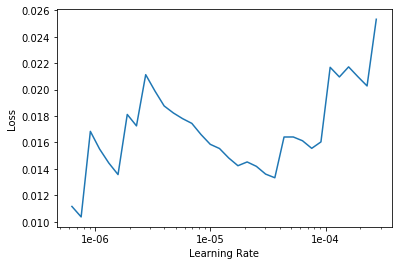

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(2, max_lr=slice(1e-06,3e-05))

epoch,train_loss,valid_loss,accuracy,time
0,0.014544,0.009421,0.997831,01:05
1,0.013763,0.010295,0.997831,01:04


In [0]:
learn.save('stage-2')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

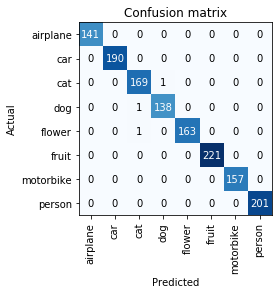

In [0]:
interp.plot_confusion_matrix()

In [0]:
losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

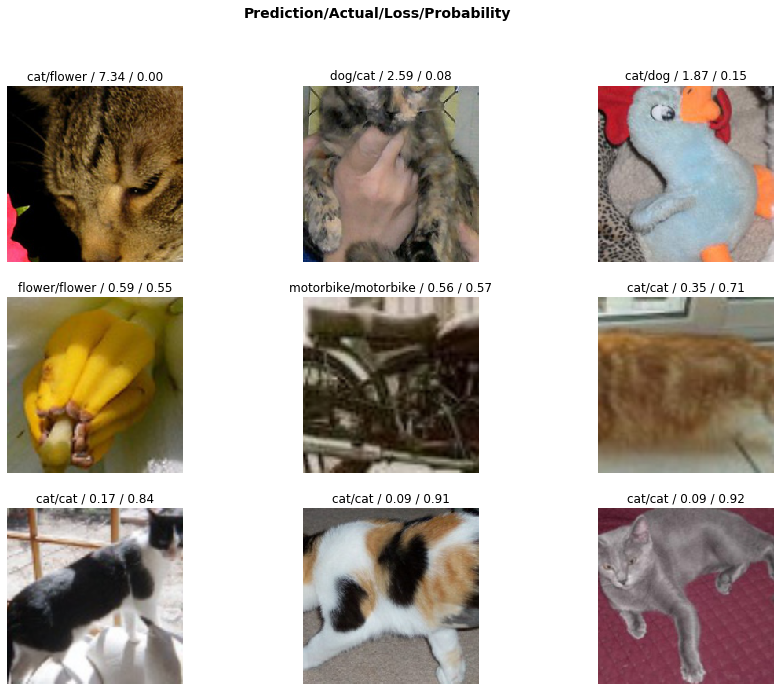

In [0]:
interp.plot_top_losses(9, figsize=(15,11))